In [19]:
from openket import *
from scipy.integrate import odeint
from sympy import var, I
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def P(t, rabi, delta):
    omega = np.sqrt(delta**2 + rabi**2)
    return rabi**2/omega**2 * (np.sin(omega*t/2))**2

# se trabaja en unidades naturales donde h_bar = 1
# las frecuencias (rabi, delta) se dan en unidades de una frecuencia base Ω₀
# el tiempo se da en unidades de 1/Ω₀
hbar = 1 #unidades naturales
t = np.linspace(0, 10, 1000) #tiempo de simulación
base = [Ket(0), Ket(1)] #base de energía
rho = Operator("rho") #operador de densidad
y0 = [1,0, 0,0, 0,0, 0,0] #condición inicial: sistema en el estado |0⟩

<Figure size 1000x600 with 0 Axes>

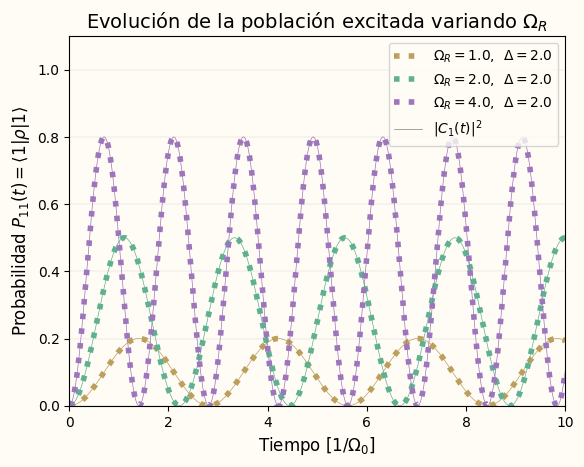

In [71]:
# Variación de la Frecuencia de Rabi (Ω_R)
plt.figure(figsize=(10, 6))
plt.figure(facecolor='#fffcf6')
plt.rcParams['axes.facecolor'] = '#fffcf6'
plt.title('Evolución de la población excitada variando $Ω_R$', fontsize=14)

delta = 2.0  # desintonización constante y fuera de resonancia
rabis = [1.0, 2.0, 4.0]
lineas = ['-', '--', ':']
colores = ["#BD9F5D", "#5eb090", "#9c75ba"]

for rabi, color in zip(rabis, colores):
    # Hamiltoniano simbólico
    H = hbar/2 * (-delta*Ket(0)*Bra(0) + -rabi*Ket(0)*Bra(1) + -rabi*Ket(1)*Bra(0) + delta*Ket(1)*Bra(1))
    
    # ecuación de von Neumann
    rdot = -(I/hbar)*comm(H, rho)

    # solución del sistema de EDOs
    solution = build_ode(rho=rho, rdot=rdot, basis=base, y0=y0, t=t, filetype=None)
    
    # graficar de la probabilidad del estado excitado ⟨1|ρ|1⟩
    plt.plot(t, solution[:, 6], label=f'$Ω_R = {rabi}$,  $Δ = {delta}$', linewidth=4, linestyle=':', color=color)
    plt.plot(t, P(t,rabi,delta), linewidth=0.5, color=color)

plt.plot([], [], '-', color='gray', label=f'|$C_1(t)|^2$', linewidth=0.5)
plt.xlabel('Tiempo [$1/Ω_0$]', fontsize=12)
plt.ylabel('Probabilidad $P_{11}(t) = \\langle 1|\\rho|1 \\rangle$', fontsize=12)
plt.legend()
plt.grid(axis='y', color='gray', linewidth=0.1)
plt.ylim(0, 1.1)
plt.xlim(0, 10)
plt.savefig("2lv atom - rabi frecuency.png")

<Figure size 1000x600 with 0 Axes>

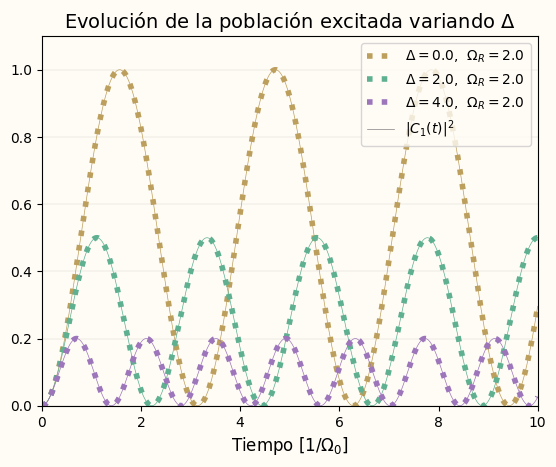

In [75]:
# Variación de la Desintonización (Δ)
plt.figure(figsize=(10, 6))
plt.figure(facecolor='#fffcf6')
plt.rcParams['axes.facecolor'] = '#fffcf6'
plt.title('Evolución de la población excitada variando $Δ$', fontsize=14)

rabi = 2.0 # Frecuencia de Rabi constante
deltas = [0.0, 2.0, 4.0]
colores = ["#BD9F5D", "#5eb090", "#9c75ba"]

for delta, color in zip(deltas, colores):
    # Hamiltoniano simbólico
    H = hbar/2 * (-delta*Ket(0)*Bra(0) + -rabi*Ket(0)*Bra(1) + -rabi*Ket(1)*Bra(0) + delta*Ket(1)*Bra(1))
    
    # ecuación de von Neumann
    rdot = -(I/hbar)*comm(H, rho)

    # solución del sistema de EDOs
    solution = build_ode(rho=rho, rdot=rdot, basis=base, y0=y0, t=t, filetype=None)
    
    # graficar la probabilidad del estado excitado ⟨1|ρ|1⟩
    plt.plot(t, solution[:, 6], label=f'$Δ = {delta}$,  $Ω_R = {rabi}$', linewidth=4, linestyle=':', color=color)
    plt.plot(t, P(t,rabi,delta), linewidth=0.5, color=color)

plt.plot([], [], '-', color='gray', label=f'|$C_1(t)|^2$', linewidth=0.5)
plt.xlabel('Tiempo [$1/Ω_0$]', fontsize=12)
#plt.ylabel('Probabilidad $P_{11}(t) = \\langle 1|ρ|1 \\rangle$', fontsize=12)
plt.legend()
plt.grid(axis='y', color='gray', linewidth=0.1)
plt.ylim(0, 1.1)
plt.xlim(0, 10)
plt.savefig("2lv atom - detuning.png")